In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
table = np.loadtxt('uploads/pt_jet.txt',skiprows=0)

In [3]:
pt = table[:,0]
xsec = table[:,1]

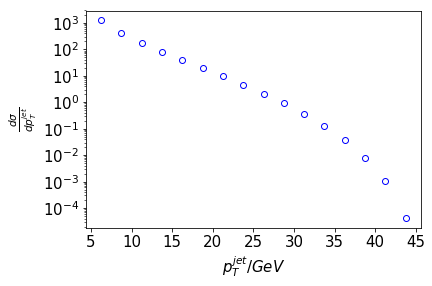

In [4]:
plt.plot(pt, xsec, 'bo', fillstyle='none')
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dp_T^{jet}}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')

In [5]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [6]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 40.8 seconds


In [7]:
c = applyCut(a, '0.1 < y < 0.85', '0.1 < y < 0.85')
c = applyCut(c, 'eta_jet < 4', 'eta_jet < 4')
c = applyCut(c, 'Q2 > 25', 'Q2 > 25')

0.1 < y < 0.85 6783540  fraction kept: 18.7
eta_jet < 4 6783540  fraction kept: 100.0
Q2 > 25 785883  fraction kept: 11.6


In [8]:
def plot1d(df, var, low, high, interval, xlabel, yscale, label):

    xvar_array = toArrayFloat(5, 45, 2.5)
    xsec = np.mean(a['xsec'])
    ntrials = a['ntrials'][a.shape[0]-1]
    
    x, hist, xerr = getHist(df, var, xvar_array)
    y = hist*xsec*1e9/(ntrials*interval)
    plt.errorbar(x, y, xerr = xerr, fmt='none', color='b', elinewidth=1, label=label)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.yscale(yscale)
    plt.xlabel(xlabel, fontsize=15)
    
    return y

In [24]:
print toArrayFloat(5, 45, 2.5)

[5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0]


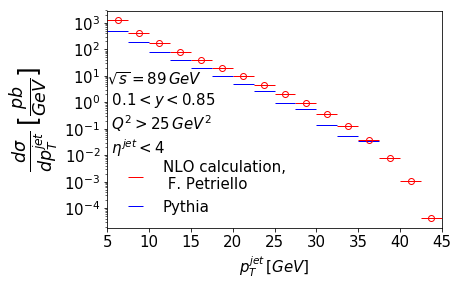

In [12]:
plt.plot(pt, xsec, 'ro', fillstyle='none')
plt.errorbar(pt, xsec, xerr=1.25, fmt='none', color='r', elinewidth=1, label='NLO calculation, \n F. Petriello')
y = plot1d(c, 'pt_jet', 5, 45, 2.5,'$p_T^{jet} \, [GeV]$','log','Pythia')
plt.text(5, 0.01, '$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 \, GeV^2$ \n $\eta^{jet} < 4$', fontsize=15)
plt.yscale('log')
plt.xlim(left=5, right=45)
plt.ylabel(r'$\frac{d\sigma}{dp_T^{jet}} \, [\frac{pb}{GeV}]$', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')

In [13]:
def plot1d(df, var, low, high, interval, xlabel, yscale, label):

    xvar_array = toArrayFloat(5, 45, 2.5)
    xsec = np.mean(a['xsec'])
    ntrials = a['ntrials'][a.shape[0]-1]
    
    x, hist, xerr = getHist(df, var, xvar_array)
    y = hist*xsec*1e13/(ntrials*interval)
    plt.errorbar(x, y, xerr = xerr, fmt='none', color='b', elinewidth=1, label=label)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.yscale(yscale)
    plt.xlabel(xlabel, fontsize=15)
    
    return y

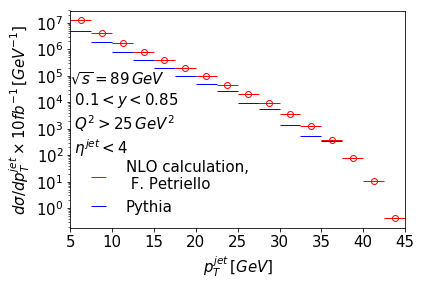

In [22]:
plt.plot(pt, xsec*1e4, 'ro', fillstyle='none')
plt.errorbar(pt, xsec*1e4, xerr=1.25, fmt='none', color='r', elinewidth=1, label='NLO calculation, \n F. Petriello')
y = plot1d(c, 'pt_jet', 5, 45, 2.5,'$p_T^{jet} \, [GeV]$','log','Pythia')
plt.text(5, 100, '$\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 \, GeV^2$ \n $\eta^{jet} < 4$', fontsize=15)
plt.yscale('log')
plt.xlim(left=5, right=45)
plt.ylabel(r'$d\sigma / dp_T^{jet} \times 10 fb^{-1} \, [GeV^{-1}]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')

In [27]:
ratio = xsec*1e4 / y

/home/youqi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


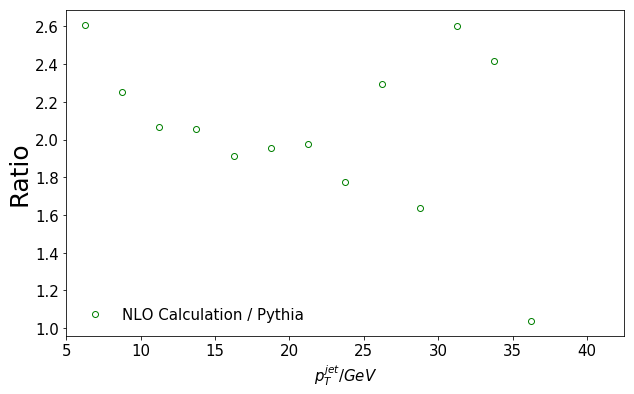

In [28]:
fig = plt.figure(figsize=(10,6))
plt.plot(pt, ratio, 'go', fillstyle='none', label='NLO Calculation / Pythia')
plt.xlim(left=5, right=42.5)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')